In [1]:
#Import Libraries 
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklego.linear_model import LADRegression



pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 100

In [2]:
#Import data
spotify_data = pd.read_csv("spotify_dataset.csv")

#print out column name: 
spotify_data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

Cleaning Data

In [3]:
# Examine the first 10 rows
spotify_data.head(10)

Unnamed: 0                track_id                               artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV                           Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b                Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
5           5  01MVOl9KtVTNfFiBU9I7dc                          Tyrone Wells   
6           6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7           7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   
8           8  0IktbUcnAGrvD03AWnz3Q8             Jason Mraz;Colbie Caillat   
9           9  7k9GuJYLp2AzqokyEdwEw2                        Ross Copperman   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Soundtrack)   
4                                                 Hold On   
5                                    Days I Will Remember   
6                             Is There Anybody Out There?   
7                     We Sing. We Dance. We Steal Things.   
8                     We Sing. We Dance. We Steal Things.   
9                                                  Hunger   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   
5        Days I Will Remember          58       214240     False   
6               Say Something          74       229400     False   
7                   I'm Yours          80       242946     False   
8                       Lucky          74       189613     False   
9                      Hunger          56       205594     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   
5         0.688  0.4810    6    -8.807     1       0.1050        0.2890   
6         0.407  0.1470    2    -8.822     1       0.0355        0.8570   
7         0.703  0.4440   11    -9.331     1       0.0417        0.5590   
8         0.625  0.4140    0    -8.700     1       0.0369        0.2940   
9         0.442  0.6320    1    -6.770     1       0.0295        0.4260   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580   0.7150   87.917               4    acoustic  
1          0.000006    0.1010   0.2670   77.489               4    acoustic  
2          0.000000    0.1170   0.1200   76.332               4    acoustic  
3          0.000071    0.1320   0.1430  181.740               3    acoustic  
4          0.000000    0.0829   0.1670  119.949               4    acoustic  
5          0.000000    0.1890   0.6660   98.017               4    acoustic  
6          0.000003    0.0913   0.0765  141.284               3    acoustic  
7          0.000000    0.0973   0.7120  150.960               4    acoustic  
8          0.000000    0.1510   0.6690  130.088               4    acoustic  
9          0.004190    0.0735   0.1960   78.899               4    acoustic

In [4]:
#Examine the first 10 random rows
spotify_data.sample(10)

Unnamed: 0                track_id  \
81108        81108  6pzlnyHTVYi5FOmrgOmC95   
106467      106467  0wnKNQ5YfXy1QTVC8yjkaq   
61247        61247  1GA9U29SZ02K9WQJ2iOA39   
32333        32333  2tQ2JXSvZGRe03YLXdmoUK   
91502        91502  2tznHmp70DxMyr2XhWLOW0   
92574        92574  2YdPpZv37DgAaDjLYvohfm   
30070        30070  1fSfbrzIlBuT1XIjqRe1eM   
111738      111738  2maTcAGttW7Jam6DkVQkr4   
9729          9729  3gJEo5miQMVaGtHEXhZCCG   
76164        76164  3asncfsjAuz7NbXoOUxjHy   

                                               artists  \
81108                                     Arijit Singh   
106467                                 Patrik Isaksson   
61247                                        Last Idol   
32333                                      Asher;Ivana   
91502                                Cage The Elephant   
92574                                    The Baseballs   
30070                        Marshmello;Jonas Brothers   
111738                                    David Holmes   
9729                        Banda Giom;Anderson Freire   
76164   Andrea Bocelli;Matteo Bocelli;Virginia Bocelli   

                                            album_name  \
81108                                        Kedarnath   
106467               10 år - en snäll mans bekännelser   
61247   Everything will be all right (Special Edition)   
32333                            On My Mind (Oh Ah Ai)   
91502                                       Melophobia   
92574                         Strings 'n' Stripes Live   
30070                                   pov: it's 2021   
111738  Ocean's Twelve (Music from the Motion Picture)   
9729                                        Identidade   
76164                               A Family Christmas   

                                   track_name  popularity  duration_ms  \
81108                   Jaan 'Nisaar (Arijit)          71       238369   
106467                Hos dig är jag underbar          38       248066   
61247                                眩しすぎる流れ星          25       291200   
32333                   On My Mind (Oh Ah Ai)          43       194754   
91502                     Cigarette Daydreams          79       208760   
92574                             Torn - Live          26       244040   
30070                Leave Before You Love Me           0       154983   
111738                      Yen on a Carousel          34       192960   
9729    Primeira Essência (Jardim Particular)          44       280125   
76164                        Joy To The World           0       183053   

        explicit  danceability  energy  key  loudness  mode  speechiness  \
81108      False         0.481   0.392    4    -8.200     1       0.0246   
106467     False         0.498   0.677    1    -6.385     0       0.0392   
61247      False         0.437   0.849    9    -2.639     0       0.0423   
32333      False         0.692   0.763    1    -4.872     1       0.0397   
91502      False         0.636   0.676    2    -3.442     1       0.0263   
92574      False         0.443   0.445    9    -9.544     1       0.0515   
30070      False         0.724   0.744    7    -4.757     1       0.0398   
111738     False         0.304   0.702    0    -7.538     0       0.0419   
9729       False         0.431   0.589    4    -5.833     1       0.0297   
76164      False         0.517   0.520   10    -6.462     1       0.0296   

        acousticness  instrumentalness  liveness  valence    tempo  \
81108       0.478000          0.000000    0.1220   0.2570   91.796   
106467      0.005570          0.002180    0.1660   0.3300  135.969   
61247       0.149000          0.000019    0.2800   0.7030  163.996   
32333       0.012900          0.028900    0.3590   0.3260  122.036   
91502       0.080700          0.000000    0.0831   0.2730  113.980   
92574       0.734000          0.000006    0.6690   0.3510   83.398   
30070       0.002190          0.000004    0.1160   0.6450  119.978   
111738     

Cleaning Data:
- Remove repeated track_id
- Check for missing values (and imputation if necessary)
- invalid values - see column definitions

In [5]:
# Count occurrences of each track id
track_id_count = spotify_data['track_id'].value_counts().reset_index()

# Rename columns for clarity
track_id_count.columns = ['track_id', 'count']

track_id_count

track_id  count
0      6S3JlDAGk3uu3NtZbPnuhS      9
1      2Ey6v4Sekh3Z0RUSISRosD      8
2      2kkvB3RNRzwjFdGhaUA0tz      8
3      5ZsAhuQ24mWHiduaxJqnhW      7
4      08kTa3SL9sV6Iy8KLKtGql      7
...                       ...    ...
89736  0kJ7eKX6aWl8X1W5Xrosn6      1
89737  4bYH5445Bn2w9UiGM0NxQw      1
89738  1T5C6ENvpM3IiYeezsK9uI      1
89739  34SatKRJgtXfL0bcgk7HMA      1
89740  2hETkH7cOfqmz3LqZDHZf5      1

[89741 rows x 2 columns]

In [6]:
# Remove duplicates and keep only one random copy
spotify_data_unique = spotify_data.drop_duplicates(subset='track_id', keep='first')

# If you want to keep a random copy, you can shuffle first
spotify_data_unique = spotify_data_unique.sample(frac=1).drop_duplicates(subset='track_id')

# Count occurrences of each track id
track_id_count = spotify_data_unique['track_id'].value_counts().reset_index()

# Rename columns for clarity
track_id_count.columns = ['track_id', 'count']

track_id_count

track_id  count
0      2V6y1V85isv7HlEK81EXjD      1
1      2XhNdrqlXOQkt1AdADIFhn      1
2      2unZ8d1DzVZEpOLx3s3qSP      1
3      5zdEyx9PsXDOXtmw3NVjcZ      1
4      5zRaLhGDH7lZcqg8kiCKkF      1
...                       ...    ...
89736  4HKbWbn8acXeTq6j0rqO5z      1
89737  3FQwvjvKnE3O4YKawVUNpA      1
89738  4rsekiMvUmDRKbpftl0HAo      1
89739  6Ox1rvlwEpB49drasQm6RF      1
89740  3GTg5ll9EJ7MLkOfxyiwIb      1

[89741 rows x 2 columns]

Valid Range for each predictor variable:

popularity: 0 - 100

duration_ms: >0 

danceability: 0 - 1

energy: 0 - 1 

key: 0 - 11 

loudness: -49.53 - 4.53 

mode: 0 or 1 (check if any values not 0 or 1)

speechiness: 0 - 1

acousticness: 0 - 1 

instrumentalness: 0 - 1

liveness: 0 - 1

valence: 0 - 1 

tempo: 0 - 243 

time_signature: 3 - 7 (bad; the minumum is less than 3)

In [25]:
#Check summaries of each row
spotify_data_unique.select_dtypes('number').describe()

Unnamed: 0    popularity   duration_ms  danceability        energy  \
count   89741.000000  89741.000000  8.974100e+04  89741.000000  89741.000000   
mean    53479.144148     33.198438  2.291418e+05      0.562166      0.634458   
std     33409.981502     20.580824  1.129477e+05      0.176691      0.256605   
min         0.000000      0.000000  0.000000e+00      0.000000      0.000000   
25%     23767.000000     19.000000  1.730400e+05      0.450000      0.457000   
50%     50681.000000     33.000000  2.132930e+05      0.576000      0.676000   
75%     80618.000000     49.000000  2.642930e+05      0.692000      0.853000   
max    113999.000000    100.000000  5.237295e+06      0.985000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  89741.000000  89741.000000  89741.000000  89741.000000  89741.000000   
mean       5.283549     -8.499004      0.636966      0.087442      0.328289   
std        3.559897      5.221490      0.480877      0.113277      0.338321   
min        0.000000    -49.531000      0.000000      0.000000      0.000000   
25%        2.000000    -10.322000      0.000000      0.036000      0.017100   
50%        5.000000     -7.185000      1.000000      0.048900      0.188000   
75%        8.000000     -5.108000      1.000000      0.085900      0.625000   
max       11.000000      4.532000      1.000000      0.965000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      89741.000000  89741.000000  89741.000000  89741.000000   
mean           0.173413      0.216970      0.469477    122.058316   
std            0.323848      0.194884      0.262864     30.117532   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.098200      0.249000     99.264000   
50%            0.000058      0.132000      0.457000    122.013000   
75%            0.097600      0.279000      0.682000    140.077000   
max            1.000000      1.000000      0.995000    243.372000   

       time_signature  
count    89741.000000  
mean         3.897427  
std          0.453435  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

In [30]:
# 1136 rows (~1%) with invalid time signatures.
# Removing these rows will not significantly impact the size of our data. However, since their other fields are useful, we keep original.
rows_invalid_time_sig = spotify_data_unique[spotify_data_unique['time_signature'] < 3]
pct_invalid_time_sig = len(rows_invalid_time_sig)/len(spotify_data_unique.index)
valid_spotify_data = spotify_data_unique[spotify_data_unique['time_signature'] >= 3]
print ("Percent of invalid time sig: " + str(pct_invalid_time_sig))

# 1136 rows (~1%) with invalid tempo value.
# Removing these rows will not significantly impact the size of our data. However, since their other fields are useful, we keep original.
rows_invalid_tempo = spotify_data_unique[(spotify_data_unique['tempo'] > 243)]
pct_invalid_tempo = len(rows_invalid_tempo) / len(spotify_data_unique) * 100
valid_spotify_data = spotify_data_unique[(spotify_data_unique['tempo'] <= 243)]
print ("Percent of invalid popularity: " + str(pct_invalid_tempo))

Percent of invalid time sig: 0.011232324132782117
Percent of invalid popularity: 0.0011143178703156864


In [31]:
#Check summaries of each row
valid_spotify_data.select_dtypes('number').describe()

Unnamed: 0    popularity   duration_ms  danceability        energy  \
count   89740.000000  89740.000000  8.974000e+04  89740.000000  89740.000000   
mean    53479.644038     33.198150  2.291427e+05      0.562167      0.634463   
std     33409.832040     20.580758  1.129480e+05      0.176692      0.256602   
min         0.000000      0.000000  0.000000e+00      0.000000      0.000000   
25%     23767.750000     19.000000  1.730400e+05      0.450000      0.457000   
50%     50681.500000     33.000000  2.132955e+05      0.576000      0.676000   
75%     80618.500000     49.000000  2.642930e+05      0.692000      0.853000   
max    113999.000000    100.000000  5.237295e+06      0.985000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  89740.000000  89740.000000  89740.000000  89740.000000  89740.000000   
mean       5.283597     -8.498895      0.636973      0.087442      0.328290   
std        3.559888      5.221416      0.480875      0.113278      0.338322   
min        0.000000    -49.531000      0.000000      0.000000      0.000000   
25%        2.000000    -10.322000      0.000000      0.036000      0.017100   
50%        5.000000     -7.185000      1.000000      0.048900      0.188000   
75%        8.000000     -5.108000      1.000000      0.085900      0.625000   
max       11.000000      4.532000      1.000000      0.965000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      89740.000000  89740.000000  89740.000000  89740.000000   
mean           0.173408      0.216971      0.469476    122.056964   
std            0.323846      0.194885      0.262865     30.114977   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.098200      0.249000     99.262750   
50%            0.000058      0.132000      0.457000    122.013000   
75%            0.097600      0.279000      0.682000    140.077000   
max            1.000000      1.000000      0.995000    222.605000   

       time_signature  
count    89740.000000  
mean         3.897437  
std          0.453427  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

In [32]:
#Calculate the percent of missingness of each variable in the data
missing_prop = (valid_spotify_data.isna().sum()/len(valid_spotify_data.index))*100
print(missing_prop.sort_values())

Unnamed: 0          0.000000
tempo               0.000000
valence             0.000000
liveness            0.000000
instrumentalness    0.000000
acousticness        0.000000
speechiness         0.000000
mode                0.000000
loudness            0.000000
time_signature      0.000000
key                 0.000000
danceability        0.000000
explicit            0.000000
duration_ms         0.000000
popularity          0.000000
track_id            0.000000
energy              0.000000
track_genre         0.000000
track_name          0.001114
album_name          0.001114
artists             0.001114
dtype: float64


In [33]:
# Print rows where track_name is missing
missing_track_name = valid_spotify_data[valid_spotify_data['track_name'].isna()]
print(missing_track_name)

       Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  key  loudness  \
65900           0            0     False         0.501   0.583    7     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
65900     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  


There is only 1 missing track_name, so we will just remove it

In [34]:
# Remove rows where any value is missing
spotify_data_cleaned = valid_spotify_data.dropna()

# Verify the rows with missing values have been removed
spotify_data_cleaned

Unnamed: 0                track_id                   artists  \
52762       52762  2V6y1V85isv7HlEK81EXjD                 Ray Price   
56549       56549  28NoqwleoFVIUOMYq3tff2                  Caloncho   
33893       33893  1mfGcxVm4sfC0FAGVSg0Hh        Coheed and Cambria   
12855       12855  72iWI2iHgKIQ8UqQm38g74                 Denise Ho   
32105       32105  2FBsVowygJJv4lg32ZHk5l     Midival Punditz;Papon   
...           ...                     ...                       ...   
76853       76853  3JvdZv9dxIHZlHu0eCKajZ            William Joseph   
62691       62691  1SE71BfSiTa8vv5c8LKIYH               Maki Ohguro   
76872       76872  7GuZED83VYeWCoXJPysg7e  Avantasia;Ralf Scheepers   
28870       28870  6OiZOyPJTWx7DorS1hdsY3                  Trivecta   
20256       20256  3GTg5ll9EJ7MLkOfxyiwIb              Charlie Puth   

                                     album_name                 track_name  \
52762                   The Essential Ray Price        Walk Me To The Door   
56549              Alternativo diferente latino                  Optimista   
33893                     No World For Tomorrow     III - The End Complete   
12855                  Ten Days in the Madhouse                       青山黛瑪   
32105                                   Purvayi       Purvayi (feat Papon)   
...                                         ...                        ...   
76853                              Safe & Sound               Safe & Sound   
62691  Greatest Hits 1991-2016 ~All Singles + ~                      ら・ら・ら   
76872                 The Wicked Rule The Night  The Wicked Rule The Night   
28870                      Ghost in the Machine       Ghost in the Machine   
20256                        Today's Party Hits               Light Switch   

       popularity  duration_ms  explicit  danceability  energy  key  loudness  \
52762          12       185760     False         0.404   0.302   10    -9.778   
56549           0       212653     False         0.885   0.479    0   -11.416   
33893          33       464066     False         0.451   0.845    4    -5.986   
12855          28       235116     False         0.459   0.367    1   -10.530   
32105          38       310146     False         0.384   0.696    5    -6.768   
...           ...          ...       ...           ...     ...  ...       ...   
76853          46       241259     False         0.440   0.355    7   -14.050   
62691          37       264177     False         0.579   0.903    5    -2.327   
76872          51       264946     False         0.290   0.909   10    -4.449   
28870          45       268998     False         0.514   0.626    2    -6.236   
20256           0       185680     False         0.690   0.626    6    -5.693   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
52762     1       0.0315      0.904000          0.000158    0.1900   0.5500   
56549     1       0.0690      0.038500          0.022100    0.3190   0.8690   
33893     0       0.0774      0.002880          0.000071    0.1690   0.4140   
12855     1       0.0560      0.507000          0.000000    0.3720   0.4370   
32105     1       0.0335      0.003850          0.015600    0.1630   0.0779   
...     ...          ...           ...               ...       ...      ...   
76853     1       0.0276      0.725000          0.911000    0.1250   0.0536   
62691     1       0.0293      0.006640          0.000000    0.2840   0.8310   
76872     0       0.0511      0.000022          0.002400    0.1140   0.2800   
28870     1       0.0343      0.022600          0.000000    0.3150   0.2970   
20256     1       0.3060      0.105000          0.000335    0.0881   0.9120   

         tempo  time_signature track_genre  
52762  123.235               3  honky-tonk  
56549  122.955               4   indie-pop  
33893  144.536               4         emo  
12855  129.795               4    cantopop  
32105  172.059               4  electronic  
...        ...           

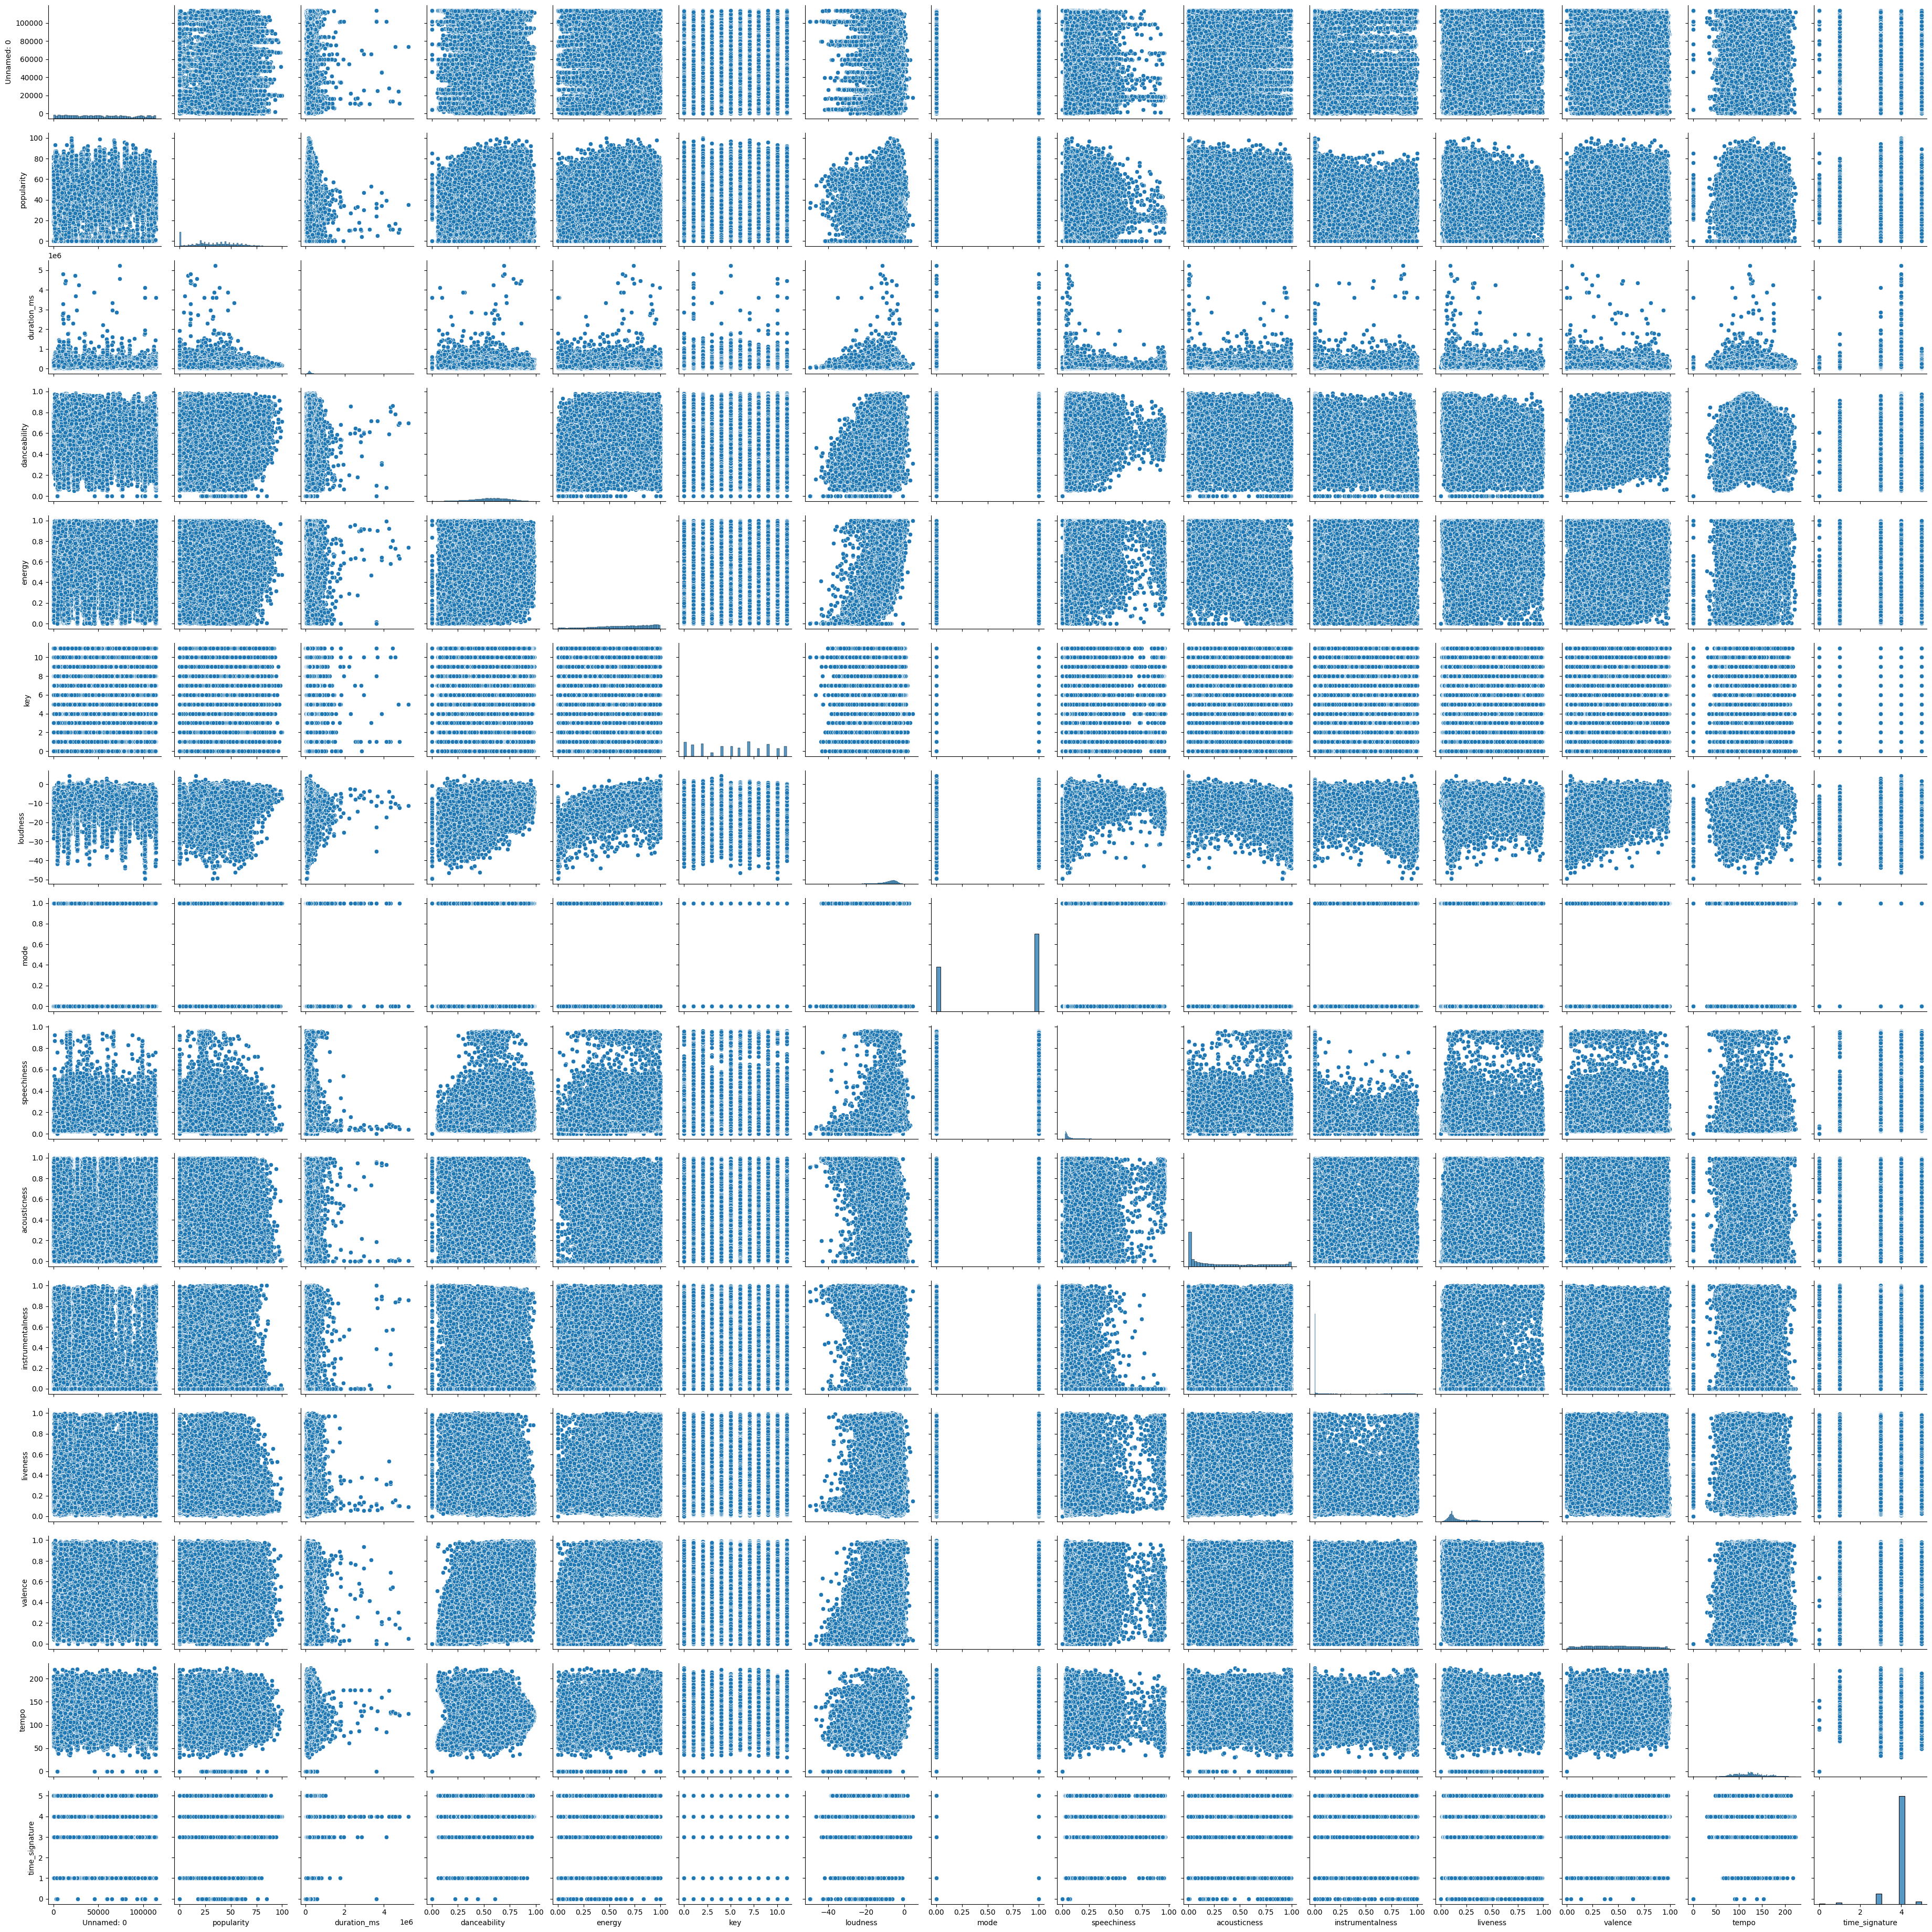

In [35]:
#Visualize scatterplot across all dependent variables
spotify_data_cleaned_dependent = spotify_data_cleaned.drop(columns = ["track_id", "artists","track_name", "track_genre", "explicit"])
sns.pairplot(data=spotify_data_cleaned_dependent)
plt.show()

In [36]:
# Select only numeric columns
spotify_data_cleaned_numeric = spotify_data_cleaned_dependent.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
Correlation_Matrix = spotify_data_cleaned_numeric.corr()

# Display the correlation matrix
print(Correlation_Matrix)

                  Unnamed: 0  popularity  duration_ms  danceability    energy  \
Unnamed: 0          1.000000    0.036347    -0.029055     -0.026001 -0.061720   
popularity          0.036347    1.000000    -0.023147      0.064284  0.013750   
duration_ms        -0.029055   -0.023147     1.000000     -0.064144  0.063246   
danceability       -0.026001    0.064284    -0.064144      1.000000  0.143905   
energy             -0.061720    0.013750     0.063246      0.143905  1.000000   
key                -0.009116    0.003458     0.011288      0.035109  0.046313   
loudness           -0.043405    0.071702     0.000345      0.271833  0.758765   
mode               -0.006219   -0.016220    -0.039389     -0.062648 -0.075046   
speechiness        -0.086857   -0.047083    -0.060753      0.109518  0.141329   
acousticness        0.086948   -0.038823    -0.108482     -0.177043 -0.732589   
instrumentalness   -0.048556   -0.127500     0.117386     -0.194744 -0.181015   
liveness            0.048406

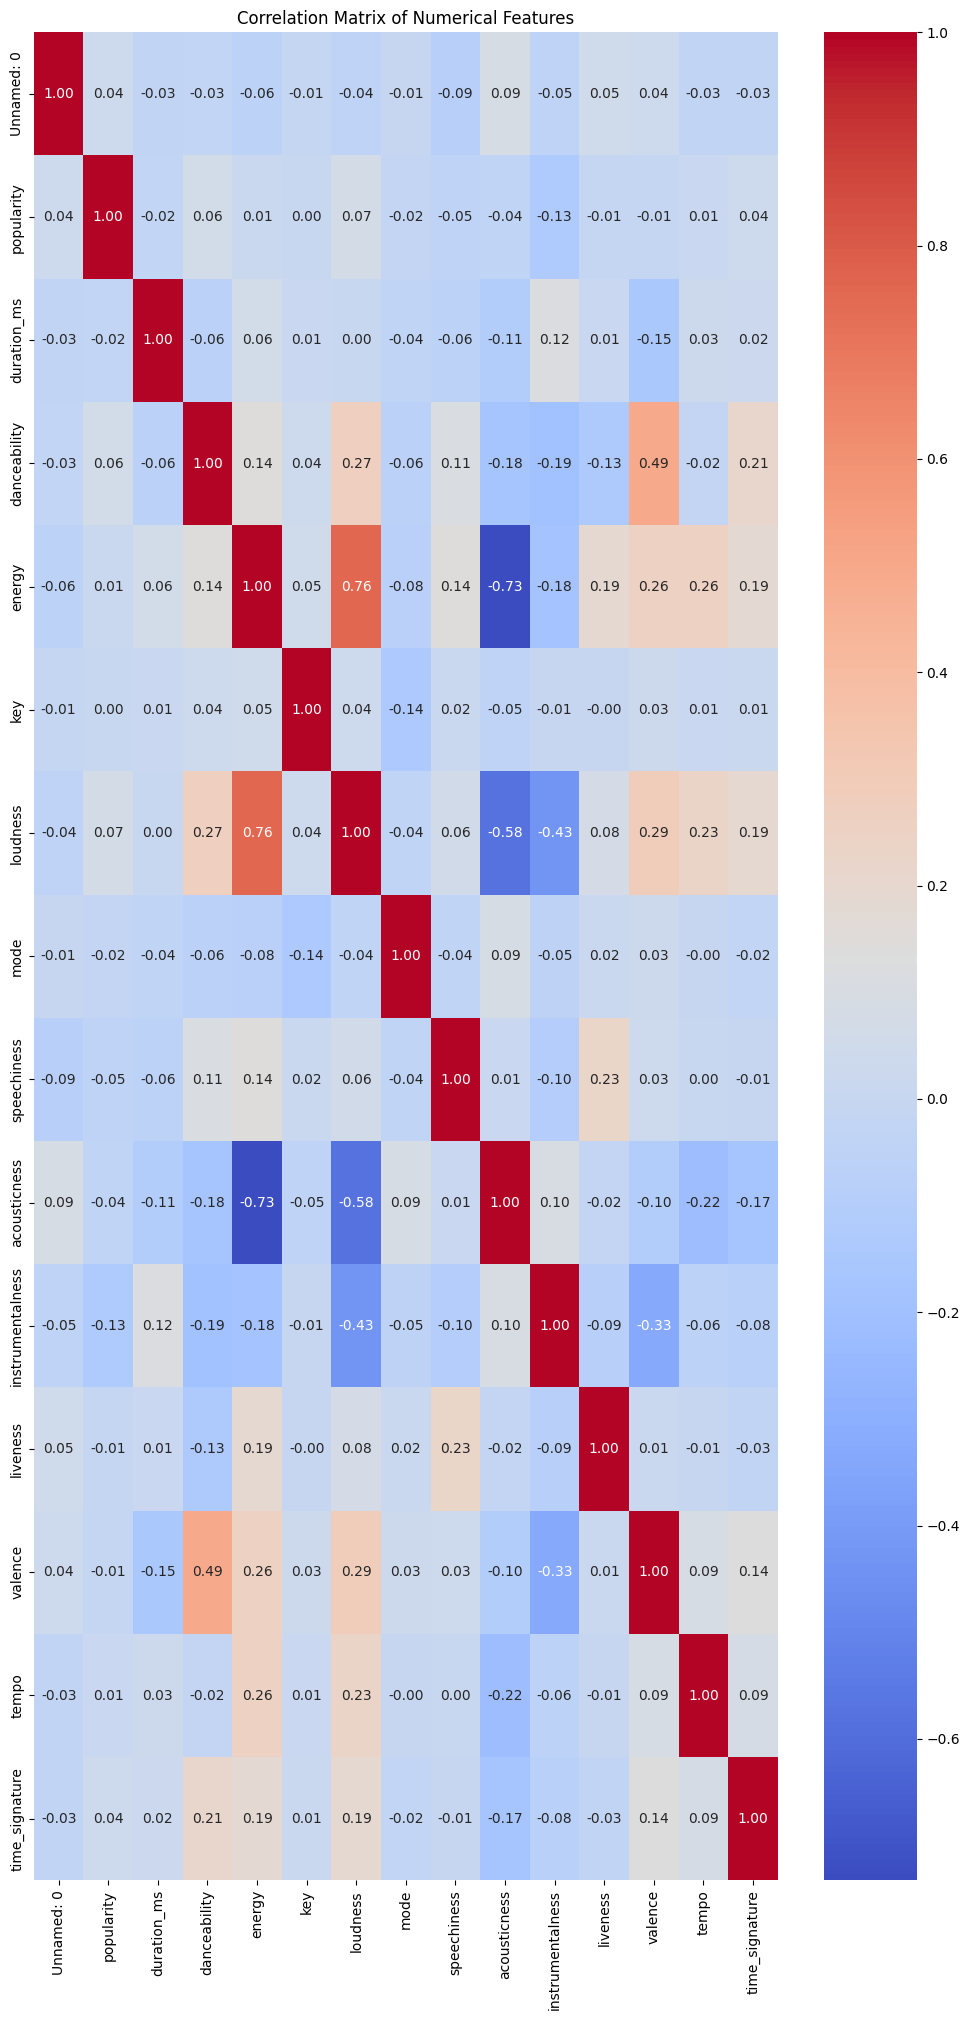

loudness            1.000000
energy              0.758765
valence             0.289113
danceability        0.271833
tempo               0.228770
time_signature      0.193662
liveness            0.077225
popularity          0.071702
speechiness         0.055290
key                 0.035879
duration_ms         0.000345
mode               -0.037139
Unnamed: 0         -0.043405
instrumentalness   -0.434701
acousticness       -0.582684
Name: loudness, dtype: float64
loudness            1.000000
energy              0.758765
valence             0.289113
danceability        0.271833
tempo               0.228770
time_signature      0.193662
liveness            0.077225
popularity          0.071702
speechiness         0.055290
key                 0.035879
duration_ms         0.000345
mode               -0.037139
Unnamed: 0         -0.043405
instrumentalness   -0.434701
acousticness       -0.582684
Name: loudness, dtype: float64


In [37]:
plt.figure(figsize=(12, 24))
sns.heatmap(Correlation_Matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Check specific correlations with 'popularity'
corr_with_popularity = Correlation_Matrix['loudness'].sort_values(ascending=False)

print(corr_with_popularity)
print(Correlation_Matrix['loudness'].sort_values(ascending=False))

# outliers - song duration
# boxplots